In [ ]:
import requests
import json
import pandas as pd
import time
import altair as alt

In [ ]:
time.sleep(10)

# Dictionaries

```
{"apples": 3}
  key      value
```

In [ ]:
myList = ["apples", "oranges", "bananas"]

In [ ]:
fruitInventory = {"apples": 3, "oranges": 5, "bananas": 100}

In [ ]:
type(fruitInventory)

dict

In [ ]:
fruitInventory.keys()

dict_keys(['apples', 'oranges', 'bananas'])

Getting data out of a dictionary:

In [ ]:
fruitInventory['apples']

3

In [ ]:
fruitInventory['kiwis']

KeyError: ignored

Put data in a dictionary:

In [ ]:
fruitInventory['kiwis'] = 10

In [ ]:
fruitInventory

{'apples': 3, 'bananas': 100, 'kiwis': 10, 'oranges': 5}

In [ ]:
fruitInventory['kiwis']

10

In [ ]:
fruitInventory.items()

dict_items([('apples', 3), ('oranges', 5), ('bananas', 100), ('kiwis', 10)])

In [ ]:
type(('apples', 3))

tuple

In [ ]:
('apples', 3).append(4)

AttributeError: ignored

In [ ]:
for inventoryPair in fruitInventory.items():
    # fruitName, numFruit = inventoryPair
    fruitName = inventoryPair[0]
    numFruit = inventoryPair[1]
    print(f"I have {numFruit} {fruitName} and they are delicious!")

I have 3 apples and they are delicious!
I have 5 oranges and they are delicious!
I have 100 bananas and they are delicious!
I have 10 kiwis and they are delicious!


In [ ]:
data = {"items": [{"fruitName": "apples", 
                   "numFruit": 3}, 
                  {"fruitName": "oranges",
                   "numFruit": 5}
                  ], "numResults": 1516}

In [ ]:
data.keys()

dict_keys(['items', 'numResults'])

In [ ]:
data.values()

dict_values([[{'fruitName': 'apples', 'numFruit': 3}, {'fruitName': 'oranges', 'numFruit': 5}], 1516])

In [ ]:
data.items()

dict_items([('items', [{'fruitName': 'apples', 'numFruit': 3}, {'fruitName': 'oranges', 'numFruit': 5}]), ('numResults', 1516)])

In [ ]:
data['items']

In [ ]:
data.keys()

dict_keys(['items', 'numResults'])

In [ ]:
data['items']

[{'fruitName': 'apples', 'numFruit': 3},
 {'fruitName': 'oranges', 'numFruit': 5}]

In [ ]:
type(data['items'])

list

In [ ]:
fruitDictList = data['items']

In [ ]:
fruitDictList[0]

{'fruitName': 'apples', 'numFruit': 3}

In [ ]:
for fruitData in fruitDictList: 
    name = fruitData['fruitName']
    num = fruitData['numFruit']
    print(f"I have {num} {name}, and they are delicious!")

I have 3 apples, and they are delicious!
I have 5 oranges, and they are delicious!


In [ ]:
data['items'][0]['numFruit']

3

In [ ]:
response = requests.get('http://corpus-db.org/api/id/5.0')

In [ ]:
response

<Response [200]>

In [ ]:
response.ok

True

In [ ]:
responseText = response.text

In [ ]:
responseDecoded = json.loads(responseText)

In [ ]:
type(responseDecoded)

dict

In [ ]:
responseDecoded.keys()

dict_keys(['lcsh', 'summary', 'series_note', 'creator', 'production_note', 'downloads', 'rights_url', 'wp_publication_date', 'authoryearofdeath', '_repo', 'wp_subjects', 'language_note', 'tableOfContents', 'gutenberg_issued', 'identifiers', 'formats', 'gutenberg_type', '', 'publication_note', 'url', 'edition_identifiers', 'rights', 'authoryearofbirth', 'wp_info', 'languages', 'LCC', 'publication_date', 'subjects', 'wikipedia', 'author', 'id', 'gutenberg_bookshelf', '_version', 'releaseDate', 'alternative_title', 'title', 'type', 'wp_literary_genres', 'contributor', 'edition_note', 'titlepage_image', 'jmdate', 'publisher', 'covers', 'description', 'filename'])

In [ ]:
responseDecoded['lcsh']

"{'United States. Constitution', 'United States -- Politics and government -- 1783-1789 -- Sources'}"

In [ ]:
responseDecoded['title']

'The United States Constitution'

In [ ]:
responseDecoded['authoryearofbirth']

KeyError: ignored

In [ ]:
def queryGoogleBooks(startIndex):
    myParams = {"q": "algorithmic bias", "startIndex": startIndex, "maxResults": 40}
    response = requests.get('https://www.googleapis.com/books/v1/volumes', 
                            params=myParams)
    if response.ok == False: 
        print('Whoa! Response not OK!')
    return json.loads(response.text)

In [ ]:
bookData = queryGoogleBooks(1)

In [ ]:
if 'title' in bookData['items'][0]: 
    print("Yay!")
else: 
    print('Nay!')

Nay!


In [ ]:
publicationDates = []
for n in range(1, 2296, 40):
    data = queryGoogleBooks(n)
    print('Querying...', n)
    time.sleep(1)
    if 'items' in data: 
        items = data['items']
        for item in items: 
            if 'volumeInfo' in item and 'publishedDate' in item['volumeInfo']: 
                pubDate = item['volumeInfo']['publishedDate']
                publicationDates.append(pubDate)

In [ ]:
cleanDates = []
for date in publicationDates: 
    cleanDate = date[:4]
    cleanDateInt = int(cleanDate)
    cleanDates.append(cleanDateInt)

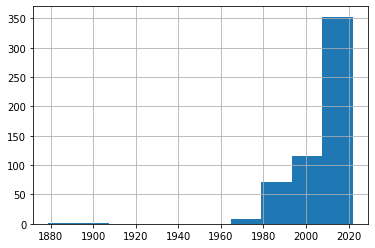

In [ ]:
pd.Series(cleanDates).hist()

In [ ]:
response.ok

True

In [ ]:
bookData = json.loads(response.text)

In [ ]:
type(bookData)

dict

In [ ]:
bookData.keys()

dict_keys(['kind', 'totalItems', 'items'])

In [ ]:
bookData['totalItems']

2296

In [ ]:
len(bookData['items'])

10

In [ ]:
items = bookData['items']

In [ ]:
items[0]['volumeInfo']

In [ ]:
for book in items: 
    print(book['volumeInfo']['title'])

Start Quilting
Paper Piecing All Year Round
Fresh Quilting
Beginner’s Guide to Free-Motion Quilting
A Quilting Life
Utility Quilting
Quilting Modern
Step-by-Step Free-Motion Quilting
Rulerwork Quilting Idea Book
Country Cottage Quilting


## Functions

A function has (optionally) an input. 
Every function has an output. 

```
def double(number):
    return number*2
```

In [ ]:
def double(number):
    doubled = number * 2
    return doubled

In [ ]:
double(5)

10

In [ ]:
double(10)

20

In [ ]:
double("Jonathan")

'JonathanJonathan'

## API Example 2


In [ ]:
baseURL = "https://covid-api.mmediagroup.fr/v1/vaccines"

In [ ]:
response = requests.get(baseURL)
if not response.ok: 
    print('Request not OK!')
else:
    responseText = response.text
    vaccineData = json.loads(responseText)

In [ ]:
vaccineData['US']['All']

{'abbreviation': 'US',
 'administered': 319872053,
 'capital_city': 'Washington',
 'continent': 'North America',
 'country': 'US',
 'elevation_in_meters': 760,
 'iso': 840,
 'life_expectancy': '77.1',
 'location': 'North America',
 'people_partially_vaccinated': 177948892,
 'people_vaccinated': 150787303,
 'population': 324459463,
 'sq_km_area': 9363520,
 'updated': '2021/06/24 00:00:00+00'}

In [ ]:
def getPercentVaccinated(country):
    countryData = vaccineData[country]
    if 'All' in countryData:
        if 'people_vaccinated' in countryData['All']:
            numVaccinated = vaccineData[country]['All']['people_vaccinated']
            if 'population' in countryData['All']:
                population = vaccineData[country]['All']['population']
                percentVaccinated = (numVaccinated / population) * 100
                return percentVaccinated

def getLifeExpectancy(country):
    countryData = vaccineData[country]
    if 'All' in countryData: 
        if 'life_expectancy' in countryData['All']:
            lifeExpectancy = countryData['All']['life_expectancy']
            return lifeExpectancy

In [ ]:
getLifeExpectancy('Japan')

'80.7'

In [ ]:
getPercentVaccinated('Iceland')

49.694798895604805

In [ ]:
vaccineData.keys()

dict_keys(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burma', 'Cambodia', 'Cameroon', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guyana', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malawi'

In [ ]:
getPercentVaccinated('Germany')

33.90027895776011

In [ ]:
percentVaccinatedByCountry = {}
for country in vaccineData:
    percentVaccinated = getPercentVaccinated(country)
    percentVaccinatedByCountry[country] = percentVaccinated

In [ ]:
vaccineData

In [ ]:
def formatData(): 
    countryData = {}
    for country in vaccineData: 
        percentVaccinated = getPercentVaccinated(country)
        lifeExpectancy = getLifeExpectancy(country)
        countryData[country] = {"percentVaccinated": percentVaccinated, 
                                "lifeExpectancy": lifeExpectancy,
                                "country": country}
    return countryData

In [ ]:
data = formatData()

In [ ]:
data

In [ ]:
df = pd.DataFrame(data)
df = df.T
df

,percentVaccinated,lifeExpectancy,country
Afghanistan,0.517201,45.9,Afghanistan
Albania,12.8193,71.6,Albania
Algeria,0,69.7,Algeria
Andorra,31.96,83.5,Andorra
Angola,1.72505,38.3,Angola
...,...,...,...
Vietnam,0.144108,69.3,Vietnam
World,None,None,World
Zambia,0.0363575,37.2,Zambia
Zimbabwe,2.66317,37.8,Zimbabwe


In [ ]:
points = alt.Chart(df).mark_point(
            ).encode(x='percentVaccinated:Q', 
                     y='lifeExpectancy:Q')
text = points.mark_text().encode(text='country').interactive()
points+text

alt.LayerChart(...)

In [ ]:
percentVaccinatedSeries = pd.Series(percentVaccinatedByCountry)

In [ ]:
df = percentVaccinatedSeries.to_frame()
df.columns=['percentVaccinated']

In [ ]:
df['country'] = df.index
df

In [ ]:
df

,percentVaccinated,country
Afghanistan,0.517201,Afghanistan
Albania,12.819284,Albania
Algeria,0.000000,Algeria
Andorra,31.959982,Andorra
Angola,1.725053,Angola
...,...,...
Vietnam,0.144108,Vietnam
World,NaN,World
Zambia,0.036358,Zambia
Zimbabwe,2.663173,Zimbabwe


In [ ]:
alt.Chart(df).mark_bar().encode(x='percentVaccinated', y='country').interactive()

alt.Chart(...)

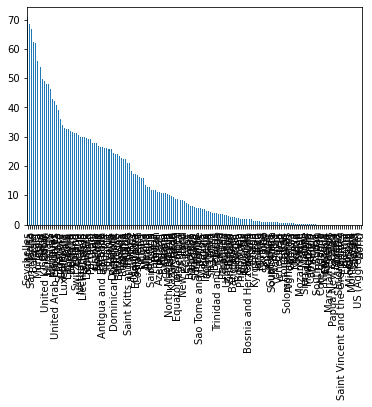

In [ ]:
percentVaccinatedSeries.sort_values(ascending=False).plot(kind='bar')

In [ ]:
import altair as alt

In [ ]:
df = percentVaccinatedSeries.to_frame()

In [ ]:
df['country'] = df.index

In [ ]:
df.rename(columns={0: 'percentVaccinated'}, inplace=True)

In [ ]:
altair.Chart(df).mark_bar().encode(x='percentVaccinated', y='country', interactive=True)

/usr/local/lib/python3.7/dist-packages/altair/utils/core.py:673: UserWarning: Unrecognized encoding channel 'interactive'
  warnings.warn("Unrecognized encoding channel '{}'".format(encoding))


SchemaValidationError: ignored

alt.Chart(...)